# 📝 Exercise M7.01

In this exercise we will define dummy classification baselines and use them as
reference to assess the relative predictive performance of a given model of
interest.

We illustrate those baselines with the help of the Adult Census dataset, using
only the numerical features for the sake of simplicity.

In [1]:
import pandas as pd

adult_census = pd.read_csv("../datasets/adult-census-numeric-all.csv")
data, target = adult_census.drop(columns="class"), adult_census["class"]

First, define a `ShuffleSplit` cross-validation strategy taking half of the
samples as a testing at each round. Let us use 10 cross-validation rounds.

In [2]:
adult_census.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,class
0,25,7,0,0,40,<=50K
1,38,9,0,0,50,<=50K
2,28,12,0,0,40,>50K
3,44,10,7688,0,40,>50K
4,18,10,0,0,30,<=50K


In [3]:
adult_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   education-num   48842 non-null  int64 
 2   capital-gain    48842 non-null  int64 
 3   capital-loss    48842 non-null  int64 
 4   hours-per-week  48842 non-null  int64 
 5   class           48842 non-null  object
dtypes: int64(5), object(1)
memory usage: 2.2+ MB


In [5]:
adult_census.shape

(48842, 6)

In [9]:
# Write your code here.
from sklearn.model_selection import ShuffleSplit,cross_validate

cv = ShuffleSplit(n_splits=10, test_size=0.5, random_state=0)#half of the data and 10 for cv

Next, create a machine learning pipeline composed of a transformer to
standardize the data followed by a logistic regression classifier.

In [10]:
# Write your code here.
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

model = make_pipeline(StandardScaler(), LogisticRegression())

Compute the cross-validation (test) scores for the classifier on this dataset.
Store the results pandas Series as we did in the previous notebook.

In [12]:
# Write your code here.
cv_results_logistic_regression = cross_validate(
    model, data, target, cv=cv, n_jobs=2
)

test_score_logistic_regression = pd.Series(
    cv_results_logistic_regression["test_score"], name="Logistic Regression"
)
test_score_logistic_regression

0    0.815937
1    0.813849
2    0.815036
3    0.815569
4    0.810982
5    0.814831
6    0.813112
7    0.810368
8    0.812375
9    0.816306
Name: Logistic Regression, dtype: float64

Now, compute the cross-validation scores of a dummy classifier that constantly
predicts the most frequent class observed the training set. Please refer to
the online documentation for the [sklearn.dummy.DummyClassifier
](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
class.

Store the results in a second pandas Series.

In [13]:
# Write your code here.
#for dummy classifier
from sklearn.dummy import DummyClassifier
most_freq = DummyClassifier(strategy="most_frequent")
cv_results_most_frequent = cross_validate(
    most_freq, data, target, cv=cv, n_jobs=2
)
test_score = pd.Series(
    cv_results_most_frequent["test_score"],
    name="most freq dummy classifier",
)
test_score

0    0.760329
1    0.756808
2    0.759142
3    0.760739
4    0.761681
5    0.761885
6    0.757463
7    0.757176
8    0.761885
9    0.763114
Name: most freq dummy classifier, dtype: float64

Now that we collected the results from the baseline and the model, concatenate
the test scores as columns a single pandas dataframe.

In [16]:
# Write your code here.
# Now that we collected the results from the baseline and the model, concatenate
# the test scores as columns a single pandas dataframe.
all_test_scores = pd.concat([test_score_logistic_regression, test_score], axis=1)
all_test_scores


,Logistic Regression,most freq dummy classifier
0,0.815937,0.760329
1,0.813849,0.756808
2,0.815036,0.759142
3,0.815569,0.760739
4,0.810982,0.761681
5,0.814831,0.761885
6,0.813112,0.757463
7,0.810368,0.757176
8,0.812375,0.761885
9,0.816306,0.763114



Next, plot the histogram of the cross-validation test scores for both models
with the help of [pandas built-in plotting
function](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#histograms).

What conclusions do you draw from the results?

Text(0.5, 1.0, 'Comparison of Classifier Accuracies')

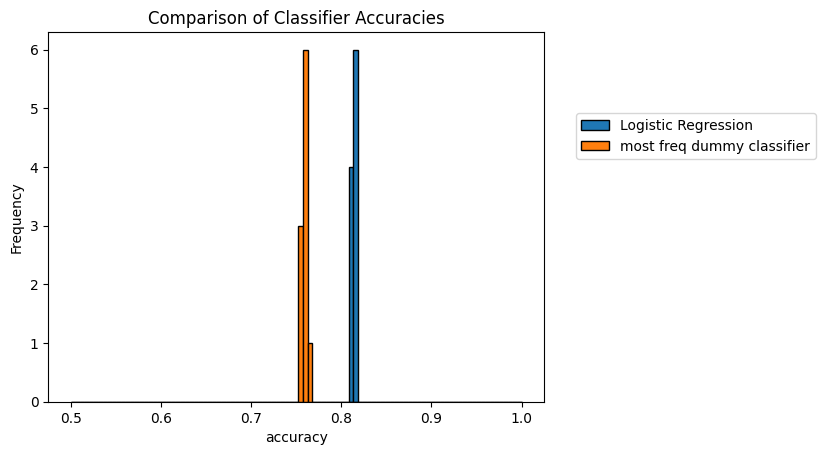

In [17]:
# Write your code here.
import numpy as np
import matplotlib.pyplot as plt

bins = np.linspace(start=0.5, stop=1.0, num=100)
all_test_scores.plot.hist(bins=bins, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("accuracy")
plt.title("Comparison of Classifier Accuracies")

Change the `strategy` of the dummy classifier to `"stratified"`, compute the
results. Similarly compute scores for `strategy="uniform"` and then the  plot
the distribution together with the other results.

Are those new baselines better than the previous one? Why is this the case?

Please refer to the scikit-learn documentation on
[sklearn.dummy.DummyClassifier](
https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)
to find out about the meaning of the `"stratified"` and `"uniform"`
strategies.

In [22]:
# Write your code here.
#stratification is when the propotion of classes arent blanaced but we want to keep the same propotion in each fold to avoid bias and misleading results
stratified_dummy = DummyClassifier(strategy="stratified")
cv_results_stratified = cross_validate(
    stratified_dummy, data, target, cv=cv, n_jobs=2
)
test_score_stratified = pd.Series(
    cv_results_stratified["test_score"], name="stratified dummy classifier"
)

In [23]:
uniform_dummy = DummyClassifier(strategy="uniform")
cv_results_uniform = cross_validate(
    uniform_dummy, data, target, cv=cv, n_jobs=2
)
test_score_uniform = pd.Series(
    cv_results_uniform["test_score"], name="uniform dummy classifier"
)

Text(0.5, 1.0, 'Comparison of Classifier Accuracies')

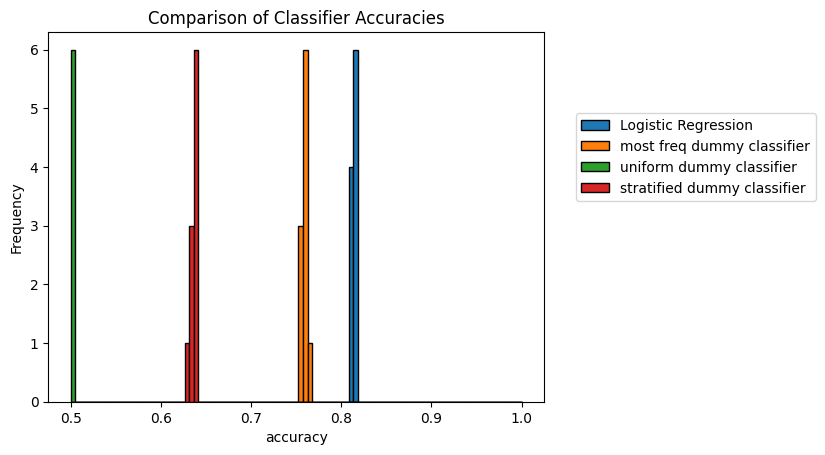

In [27]:
all_test_scores = pd.concat(
    [
        test_score_logistic_regression,
        test_score,
        test_score_uniform,
        test_score_stratified,
    ],
    axis="columns",
)
all_test_scores.plot.hist(bins=bins, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("accuracy")
plt.title("Comparison of Classifier Accuracies")
